<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; display: flex; align-items: center; justify-content: space-between; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);"> 
  <!-- Texto del proyecto -->
  <div style="text-align: left; max-width: 75%;">
    <h2 style="font-size: 30px; font-weight: bold; margin: 0;">Proyecto Final Deep Learning</h2>
    <hr style="border: 1px solid white; width: 50%; margin: 10px 0;">
    <p style="font-size: 18px; margin: 10px 0 0 0;">
      Modelo LSTM para pronostico de consumo de Agua potable, basado en variables históricas de consumo y condiciones hidrometeorológicas en Bogotá.
    </p>
  </div>
</div>

<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <p style="font-size: 18px; margin: 0;">
    En este proyecto, se aborda el problema del pronóstico de consumo de agua potable en la ciudad de Bogotá utilizando como referencia variables hidrometeorológicas. El objetivo principal es desarrollar un modelo predictivo basado en redes neuronales LSTM que permita anticipar variaciones mensuales en la demanda de agua, considerando la influencia de factores como temperatura, humedad relativa, precipitación y eventos contextuales como cuarentenas o racionamientos. Esta herramienta busca apoyar la planificación operativa y la toma de decisiones estratégicas para el manejo eficiente del recurso hídrico en la región.
  </p>
</div>


____________________________________________________________________________________________________________

<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); text-align: center;">
  <p style="font-size: 24px; font-weight: bold; margin-bottom: 20px;">0. Librerias</p>
  <p style="font-size: 18px; margin: 0;">
    Acontinuación actualizaremos las librerias necesarias
  </p>
</div>

In [57]:
# Proyecto: Predicción del Consumo de Agua con LSTM
# Librerias

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.layers import Dropout


____________________________________________________________________________________________________________

<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); text-align: center;">
  <p style="font-size: 24px; font-weight: bold; margin-bottom: 20px;">1. Exploración de los Datos</p>
  <p style="font-size: 18px; margin: 0;">
    Antes de entrenar el modelo de predicción de consumo de agua, se realiza una exploración detallada de las variables disponibles:
  </p>
</div>

<div style="font-family: Arial, sans-serif; padding: 20px 40px; border: 1px solid #ccc; border-radius: 8px; background-color: #f9f9f9;">
  <table style="width:100%; border-collapse: collapse;">
    <thead>
      <tr style="background-color: #e6e6e6;">
        <th style="text-align: left; padding: 8px; border: 1px solid #ddd;">Variable</th>
        <th style="text-align: left; padding: 8px; border: 1px solid #ddd;">Descripción</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;"><strong>Consumo_Bogota</strong></td>
        <td style="padding: 8px; border: 1px solid #ddd;">Volumen mensual de agua (en m³) consumido en la ciudad, basado en registros abiertos.</td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;"><strong>Temp_aire_media</strong></td>
        <td style="padding: 8px; border: 1px solid #ddd;">Temperatura promedio mensual en Bogotá (°C), de fuentes meteorológicas oficiales.</td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;"><strong>Humedad_relativa_media</strong></td>
        <td style="padding: 8px; border: 1px solid #ddd;">Promedio mensual de humedad relativa (%) registrada por estaciones climáticas.</td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;"><strong>Precipitacion_mm</strong></td>
        <td style="padding: 8px; border: 1px solid #ddd;">Total mensual de precipitación (mm) acumulado.</td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;"><strong>Variables dummies</strong></td>
        <td style="padding: 8px; border: 1px solid #ddd;">Variables binarizadas por mes para capturar estacionalidad (por ejemplo, <code>mes_3</code>, <code>mes_5</code>).</td>
      </tr>
      <tr>
        <td style="padding: 8px; border: 1px solid #ddd;"><strong>Eventos contextuales</strong></td>
        <td style="padding: 8px; border: 1px solid #ddd;">
          <ul style="margin: 0; padding-left: 16px;">
            <li><code>cuarentena</code>: periodo nacional del 25 de marzo al 31 de agosto de 2020.</li>
            <li><code>aislamiento</code>: periodo de aislamiento selectivo entre septiembre 2020 y julio 2022.</li>
            <li><code>racionamiento</code>: restricción del suministro entre abril 2024 y abril 2025.</li>
          </ul>
        </td>
      </tr>
    </tbody>
  </table>
</div>

<p style="font-family: Arial, sans-serif; font-size: 16px; padding: 0 40px; margin-top: 20px;">
  Se incorporaron variables como precipitaciOn mensual, temperatura media del aire y humedad relativa debido a su influencia directa sobre el comportamiento del consumo de agua en Bogotá. La temperatura puede aumentar el uso doméstico y comercial del recurso, mientras que la precipitación suele reducir la demanda por menor necesidad de riego y limpieza. La humedad relativa complementa este análisis, indicando condiciones ambientales que afectan los hábitos de consumo. Estas variables fueron elegidasdebido a su disponibilidad histórica, periodicidad mensual y relevancia en estudios de predicción hídrica.Esta sección permite validar la integridad, estacionalidad y relevancia de las variables seleccionadas para el análisis predictivo.
</p>

<div style="font-family: Arial, sans-serif; padding: 20px 40px; border: 1px solid #ccc; border-radius: 8px; background-color: #f5f5f5; margin-top: 20px;">
  <p style="margin: 0; font-size: 14px;"><strong>Nota importante:</strong> Los datos utilizados en este proyecto fueron obtenidos de fuentes públicas oficiales:</p>
  <ul style="margin-top: 5px;">
    <li><a href="http://dhime.ideam.gov.co/atencionciudadano/" target="_blank">IDEAM - DHIME</a></li>
    <li><a href="https://datosabiertos.bogota.gov.co/organization/eaab" target="_blank">Datos Abiertos Bogotá - EAAB</a></li>
  </ul>
</div>


In [4]:
#------------------------------------------------------------------------------------------------------------------
# A. Cargue, limpieza y organización de los datos
#
#------------------------------------------------------------------------------------------------------------------

# 1. Cargar todos los archivos de consumo de agua
folder = './data'
archivos_csv = [f for f in os.listdir(folder) if 'consumo' in f.lower() and f.endswith('.csv')]
df_prec = pd.read_csv('./data/Precipitacion_20250523.csv', encoding='utf-8')  


In [5]:
# 2. Convertir columna de fecha
df_prec['FechaObservacion'] = pd.to_datetime(df_prec['FechaObservacion'], errors='coerce')
df_prec = df_prec.dropna(subset=['FechaObservacion', 'ValorObservado'])

# 3. Agrupar por mes (suma mensual)
df_prec_mensual = df_prec.groupby(df_prec['FechaObservacion'].dt.to_period('M'))['ValorObservado'].sum().reset_index()
df_prec_mensual['Fecha'] = df_prec_mensual['FechaObservacion'].dt.to_timestamp()
df_prec_mensual = df_prec_mensual[['Fecha', 'ValorObservado']].rename(columns={'ValorObservado': 'Precipitacion_mm'})


In [6]:
# 4. Funciones de limpieza
# Consolidar solo archivos válidos con las 4 columnas necesarias 
dfs = []
for f in archivos_csv:
    path = os.path.join(folder, f)
    try:
        df = pd.read_csv(path, encoding='latin1', sep=';')
        if df.shape[1] == 4:
            df.columns = ['Mes', 'Consumo_Bogota', 'Consumo_Soacha', 'Consumo_Gachancipa']
            for col in ['Consumo_Bogota', 'Consumo_Soacha', 'Consumo_Gachancipa']:
                df[col] = df[col].astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False)
                df[col] = pd.to_numeric(df[col], errors='coerce')
            df['Fecha'] = pd.to_datetime(df['Mes'], format='%b-%y', errors='coerce')
            dfs.append(df[['Fecha', 'Consumo_Bogota', 'Consumo_Soacha', 'Consumo_Gachancipa']])
        else:
            print(f"Archivo omitido por columnas no estándar: {f}")
    except Exception as e:
        print(f"Error leyendo {f}: {e}")



In [17]:
# 5. Unificar la serie completa de consumo de agua
df_consumo = pd.concat(dfs, ignore_index=True).dropna().sort_values('Fecha')
df_consumo = df_consumo.drop(columns=['Consumo_Soacha', 'Consumo_Gachancipa'])

In [18]:
df_consumo

,Fecha,Consumo_Bogota
98,2017-02-01,11.10
99,2017-03-01,10.91
101,2017-05-01,11.08
102,2017-06-01,11.22
103,2017-07-01,11.15
...,...,...
65,2024-06-01,10.46
66,2024-07-01,10.31
68,2024-09-01,10.19
69,2024-10-01,10.14


In [19]:
# 6. Función para procesar temperatura y humedad desde archivos
#-----------------------------------------------------------------------------------------------------------------------------
# Esta función procesa múltiples archivos de datos meteorológicos en formato Excel para consolidar una única serie temporal.
#
#    Parametros de entrada
#    * pattern (str): Prefijo común en los nombres de los archivos (e.g., 'HUMEDAD', 'TEMPERATURAAIRE').
#    * medida_target (str): Nombre exacto de la medida que se desea filtrar en la columna 'Medida'.
#    * nombre_columna_final (str): Nombre final que recibirá la columna de valores al retornar el DataFrame.
#
#    Devuelve:
#    * pd.DataFrame: Serie temporal mensual promedio con columnas ['Fecha', nombre_columna_final].
#      Si no se encuentran datos validos, retorna un DataFrame vacio con las columnas esperadas.
#-----------------------------------------------------------------------------------------------------------------------------
folder = './data'

def procesar_variable_desde_archivos(pattern, medida_target, nombre_columna_final):
    archivos = [f for f in os.listdir(folder) if f.startswith(pattern) and f.endswith('.xlsx')]
    df_total = []
    for archivo in archivos:
        try:
            df = pd.read_excel(os.path.join(folder, archivo))
            if 'Medida' not in df.columns or 'Fecha' not in df.columns or 'Valor:' not in df.columns:
                print(f"Omitido {archivo}: columnas faltantes")
                continue
            df = df[df['Medida'].str.strip() == medida_target]
            df = df[['Fecha', 'Valor:']].copy()
            df['Fecha'] = pd.to_datetime(df['Fecha'])
            df = df.groupby(df['Fecha'].dt.to_period('M')).mean(numeric_only=True)
            df.index = df.index.to_timestamp()
            df = df.rename(columns={'Valor:': nombre_columna_final}).reset_index()
            df_total.append(df)
        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")
    if df_total:
        return pd.concat(df_total, ignore_index=True).groupby('Fecha').mean(numeric_only=True).reset_index()
    else:
        print(f"No se encontraron datos válidos para: {nombre_columna_final}")
        return pd.DataFrame(columns=['Fecha', nombre_columna_final])
    


In [20]:
temp_aire = procesar_variable_desde_archivos(
    'TEMPERATURAAIRE',
    'Temperatura del aire a 2 metros media mensual',
    'Temp_aire_media',
)

humedad = procesar_variable_desde_archivos(
    'HUMEDAD',
    'Humedad relativa del aire a 2 metros media mensual',
    'Humedad_relativa_media'
)


In [21]:
# 7. Unir las variables meteorológicas en un solo DataFrame
df_clima = temp_aire.merge(humedad, on='Fecha', how='outer')
df_clima

,Fecha,Temp_aire_media,Humedad_relativa_media
0,2017-01-01,13.100101,78.621603
1,2017-02-01,13.283279,72.822106
2,2017-03-01,13.388424,81.885145
3,2017-04-01,13.620945,67.072772
4,2017-05-01,13.898288,72.691155
...,...,...,...
91,2024-08-01,13.760722,67.111806
92,2024-09-01,13.807737,67.292361
93,2024-10-01,13.852116,72.994178
94,2024-11-01,13.544178,79.410335


In [22]:
df_clima = df_clima.merge(df_prec_mensual, on='Fecha', how='left')

In [23]:
# Unión o merge final de los datos de consumo y de cliema
# Validaciones antes del merge final

if df_clima.empty:
    raise ValueError("df_clima está vacío. Revisa los archivos de entrada o los nombres de medidas.")

df_final = df_consumo.merge(df_clima, on='Fecha', how='inner')
if df_final.empty:
    raise ValueError("df_final está vacío después del merge. Verifica que las fechas coincidan entre consumo y clima.")

features = ['Consumo_Bogota', 'Temp_aire_media', 'Humedad_relativa_media']
missing_cols = [col for col in features if col not in df_final.columns]
if missing_cols:
    raise KeyError(f"Faltan columnas necesarias en df_final: {missing_cols}")

df_final = df_final.dropna(subset=features)
df_final = df_final.drop_duplicates(subset='Fecha', keep='first')


In [24]:
# Se agregan vairables Dummys relacionadas a eventos como pandemias racionamiento cuarentena 
# adicionalmente se convierte a variables dummys los meses del mes


df_final['cuarentena'] = df_final['Fecha'].between('2020-03-25', '2020-08-31').astype(int)
df_final['aislamiento'] = df_final['Fecha'].between('2020-09-01', '2022-07-01').astype(int)
df_final['racionamiento'] = df_final['Fecha'].between('2024-04-11', '2025-04-12').astype(int)

df_final['mes'] = df_final['Fecha'].dt.month
df_final = pd.get_dummies(df_final, columns=['mes'], drop_first=True)

In [25]:
df_final

,Fecha,Consumo_Bogota,Temp_aire_media,Humedad_relativa_media,Precipitacion_mm,cuarentena,aislamiento,racionamiento,mes_3,mes_5,mes_6,mes_7,mes_9,mes_10,mes_11
0,2017-02-01,11.10,13.283279,72.822106,129.1,0,0,0,False,False,False,False,False,False,False
1,2017-03-01,10.91,13.388424,81.885145,368.7,0,0,0,True,False,False,False,False,False,False
2,2017-05-01,11.08,13.898288,72.691155,227.4,0,0,0,False,True,False,False,False,False,False
3,2017-06-01,11.22,13.586447,71.383104,143.6,0,0,0,False,False,True,False,False,False,False
4,2017-07-01,11.15,12.821366,78.451715,12.5,0,0,0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2024-06-01,10.46,14.263445,31.853157,NaN,0,0,1,False,False,True,False,False,False,False
68,2024-07-01,10.31,14.050310,70.674059,NaN,0,0,1,False,False,False,True,False,False,False
69,2024-09-01,10.19,13.807737,67.292361,NaN,0,0,1,False,False,False,False,True,False,False
70,2024-10-01,10.14,13.852116,72.994178,NaN,0,0,1,False,False,False,False,False,True,False


In [27]:
#------------------------------------------------------------------------------------------------------------------
# B. Análisis estadistico y graficas de los datos del dataset final
#
#------------------------------------------------------------------------------------------------------------------

# Selección de caracteristicas de interes
features = [
    'Consumo_Bogota',
    'Temp_aire_media',
    'Humedad_relativa_media',
    'cuarentena',
    'aislamiento',
    'racionamiento',
    'Precipitacion_mm'
] + [col for col in df_final.columns if col.startswith('mes_')]

df_final = df_final.dropna(subset=features)

In [28]:
# Extraer automáticamente todas las columnas relevantes para modelado
features = ['Consumo_Bogota', 'Temp_aire_media', 'Humedad_relativa_media', 'Precipitacion_mm',
            'cuarentena', 'aislamiento', 'racionamiento'] + \
           [col for col in df_final.columns if col.startswith('mes_')]

# Verifica qué columnas están incluidas
print("Features seleccionados:")
print(features)

# Asegúrate de eliminar cualquier fila con NaN en esas columnas
df_final = df_final.dropna(subset=features)

Features seleccionados:
['Consumo_Bogota', 'Temp_aire_media', 'Humedad_relativa_media', 'Precipitacion_mm', 'cuarentena', 'aislamiento', 'racionamiento', 'mes_3', 'mes_5', 'mes_6', 'mes_7', 'mes_9', 'mes_10', 'mes_11']


In [29]:
# Estadísticas básicas de las variables numéricas
df_final.describe().T

,count,mean,min,25%,50%,75%,max,std
Fecha,49,2020-02-29 21:03:40.408163328,2017-02-01 00:00:00,2018-07-01 00:00:00,2020-02-01 00:00:00,2021-11-01 00:00:00,2023-09-01 00:00:00,NaN
Consumo_Bogota,49.0,11.065102,10.61,10.89,11.09,11.32,11.42,0.25323
Temp_aire_media,49.0,13.462119,12.642913,13.229514,13.367137,13.668634,14.53377,0.399669
Humedad_relativa_media,49.0,77.719506,65.787432,74.856244,77.756505,79.958919,93.8463,5.251399
Precipitacion_mm,49.0,192.158776,1.45,75.93,153.6,270.85,579.43,149.565309
cuarentena,49.0,0.061224,0.0,0.0,0.0,0.0,1.0,0.242226
aislamiento,49.0,0.265306,0.0,0.0,0.0,1.0,1.0,0.446071
racionamiento,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Sofia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sofia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sofia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sofia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

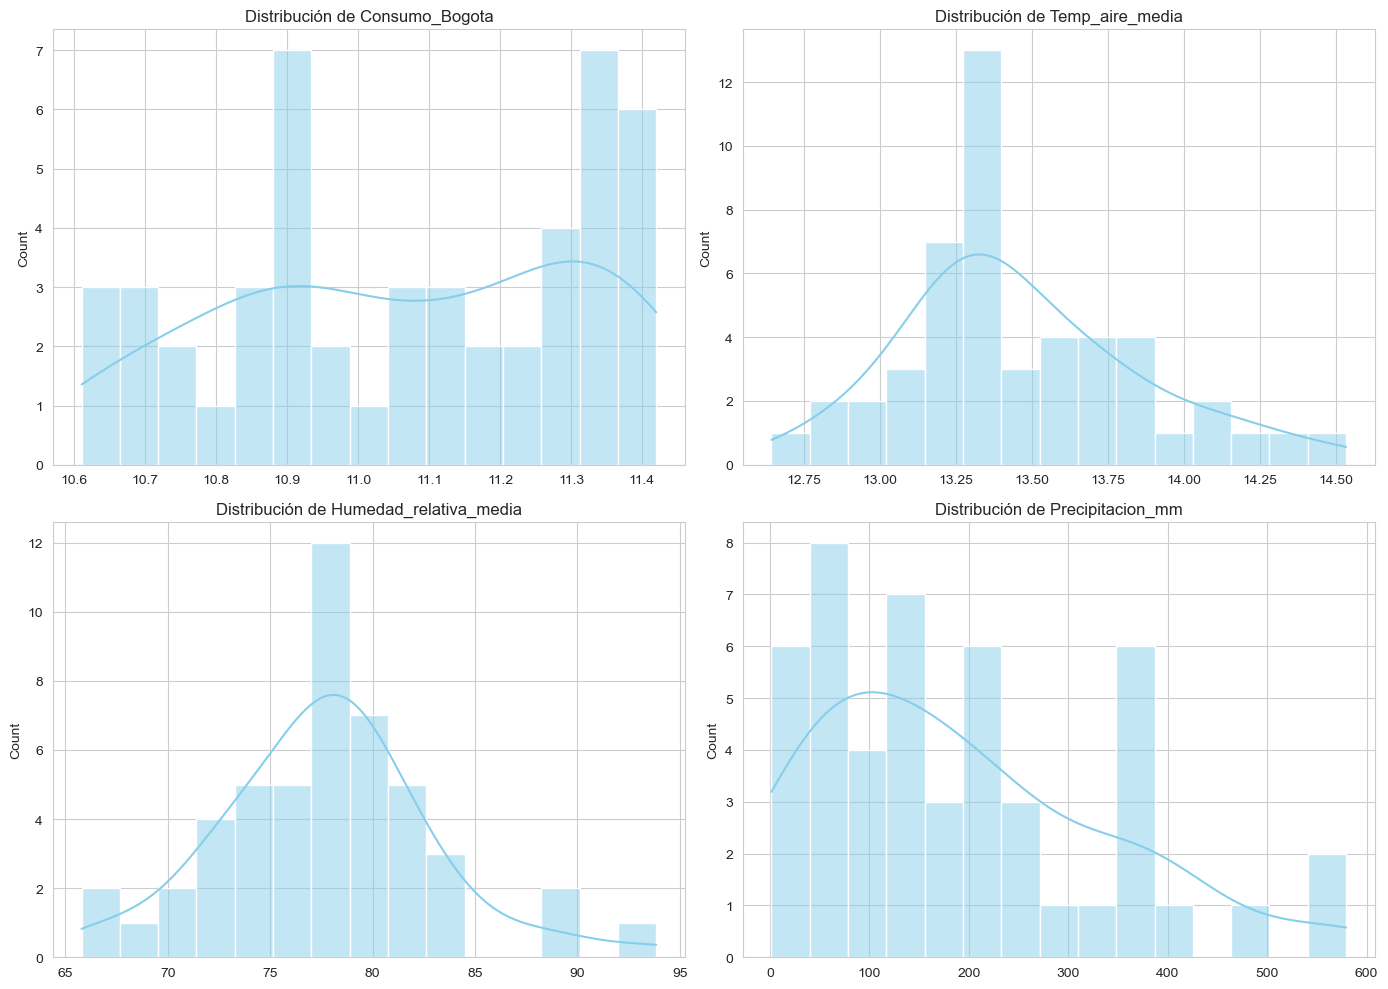

In [38]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Consumo_Bogota', 'Temp_aire_media', 'Humedad_relativa_media', 'Precipitacion_mm']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_final[col], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

______________________

#### Distribuciones (histogramas + KDE)

El Consumo_Bogotá presenta una distribución aproximadamente normal, con una ligera asimetría positiva. La mayoría de los valores se concentran entre 10.9 y 11.3 m³, lo que indica estabilidad en el consumo promedio mensual, sSin embargo, hay cierta dispersión que podría corresponder a eventos contextuales, debidos al racionamiento o la pandemia.

La Temp_aire_media se observa una distribución levemente sesgada a la izquierda. La temperatura promedio mensual en Bogotá oscila entre 12.7 °C y 14.5 °C, siendo los valores más frecuentes cercanos a 13.3 °C. Esta variable podría tener un efecto inverso sobre el consumo.

La Humedad_relativa_media presenta una forma cercana a la distribución normal, con un valor modal entre 76% y 80%, esto sugiere estabilidad en la humedad ambiental en la serie analizada.

La Precipitacion_mm es claramente asimétrica a la derecha, con muchos valores bajos y unos pocos eventos extremos de alta precipitación (outliers naturales), se puede observar que esta  variable es altamente estacional lo que podría tener impacto en el consumo en ciertos meses.

_____________________

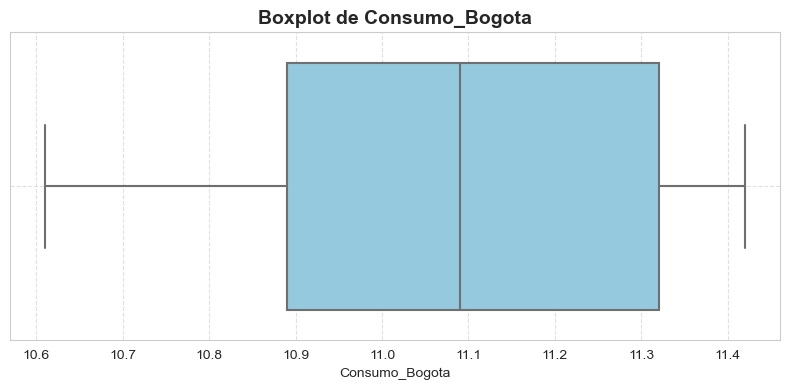

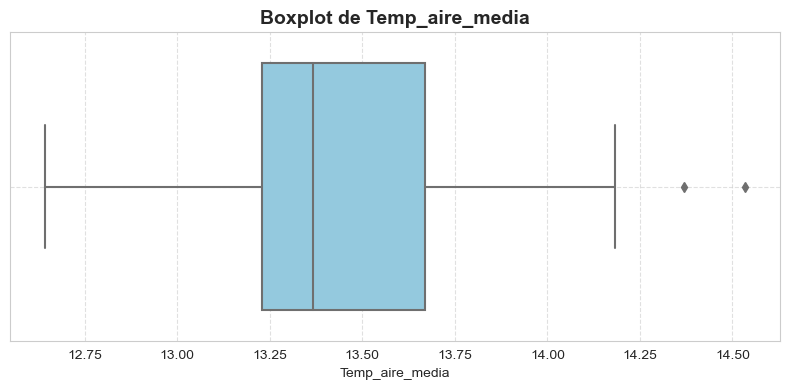

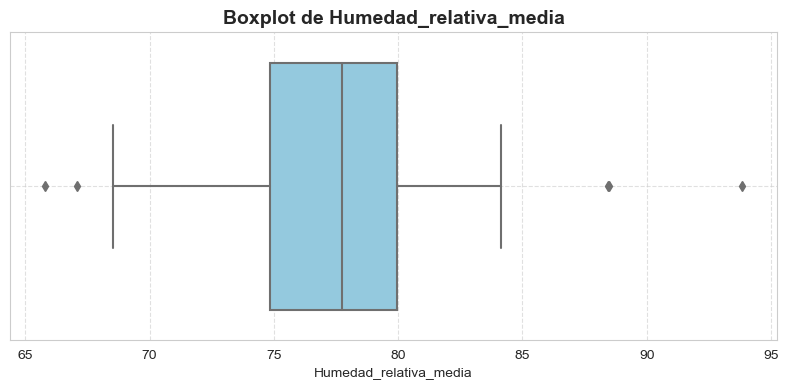

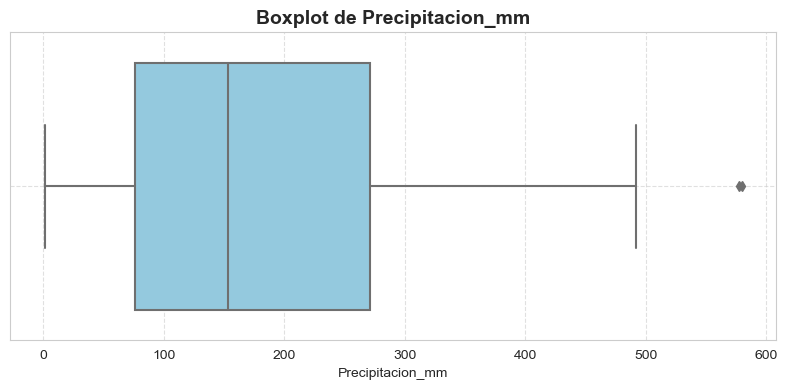

In [42]:
variables = ['Consumo_Bogota', 'Temp_aire_media', 'Humedad_relativa_media', 'Precipitacion_mm']

for var in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_final[var], color='skyblue')
    plt.title(f'Boxplot de {var}', fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()


______________________________

#### Boxplot

Los boxplots confirman las observaciones anteriores vistas en los histogramas, donde la precipitación presenta varios valores atípicos por arriba de 500 mm, típicos de eventos lluviosos extremos.

Por otra parte la humedad relativa y temperatura son bastante estables, con pocos outliers, sin embargo el consumo de agua no muestra valores extremos importantes, pero sí una ligera variabilidad, donde se demuestra que seria interesante poder obtener mas datos, tal vez en frecuencias diarias por parte de la entidad para poder dicernir mejor el comportamiento.

__________________________________

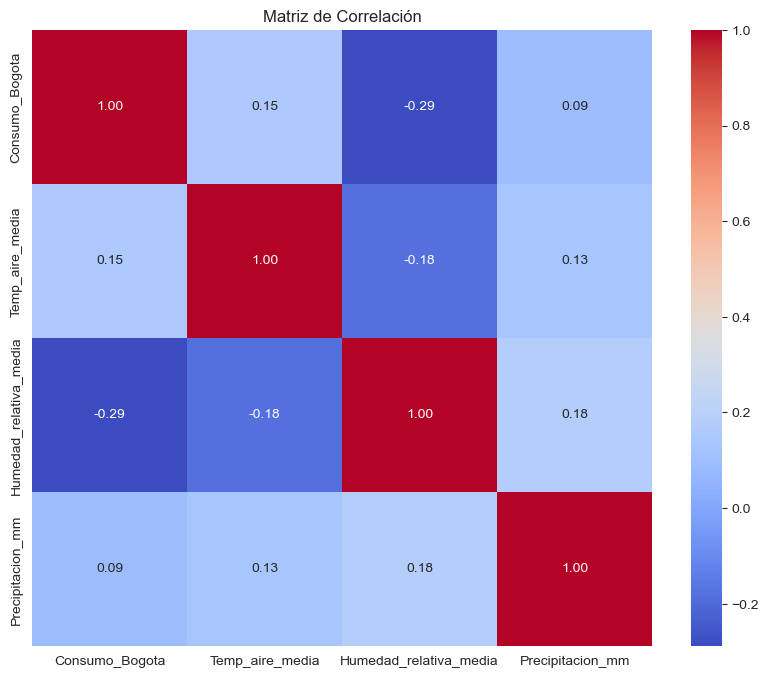

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_final[['Consumo_Bogota', 'Temp_aire_media', 'Humedad_relativa_media', 'Precipitacion_mm']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

___________________

#### Diagrama de Correlación

Las correlaciones son moderadas o débiles, pero revelan algunos patrones:

Por ejemplo en el Consumo_Bogota se muestra una correlación negativa con la humedad relativa (-0.29), lo que sugiere que en meses más húmedos el consumo disminuye, posiblemente por menor evaporación o uso exterior del agua.

Correlaciones débiles con temperatura (+0.15) y precipitación (+0.09), que podrían no ser significativas de forma lineal, pero sí tener efectos no lineales detectables con redes LSTM.



________________________

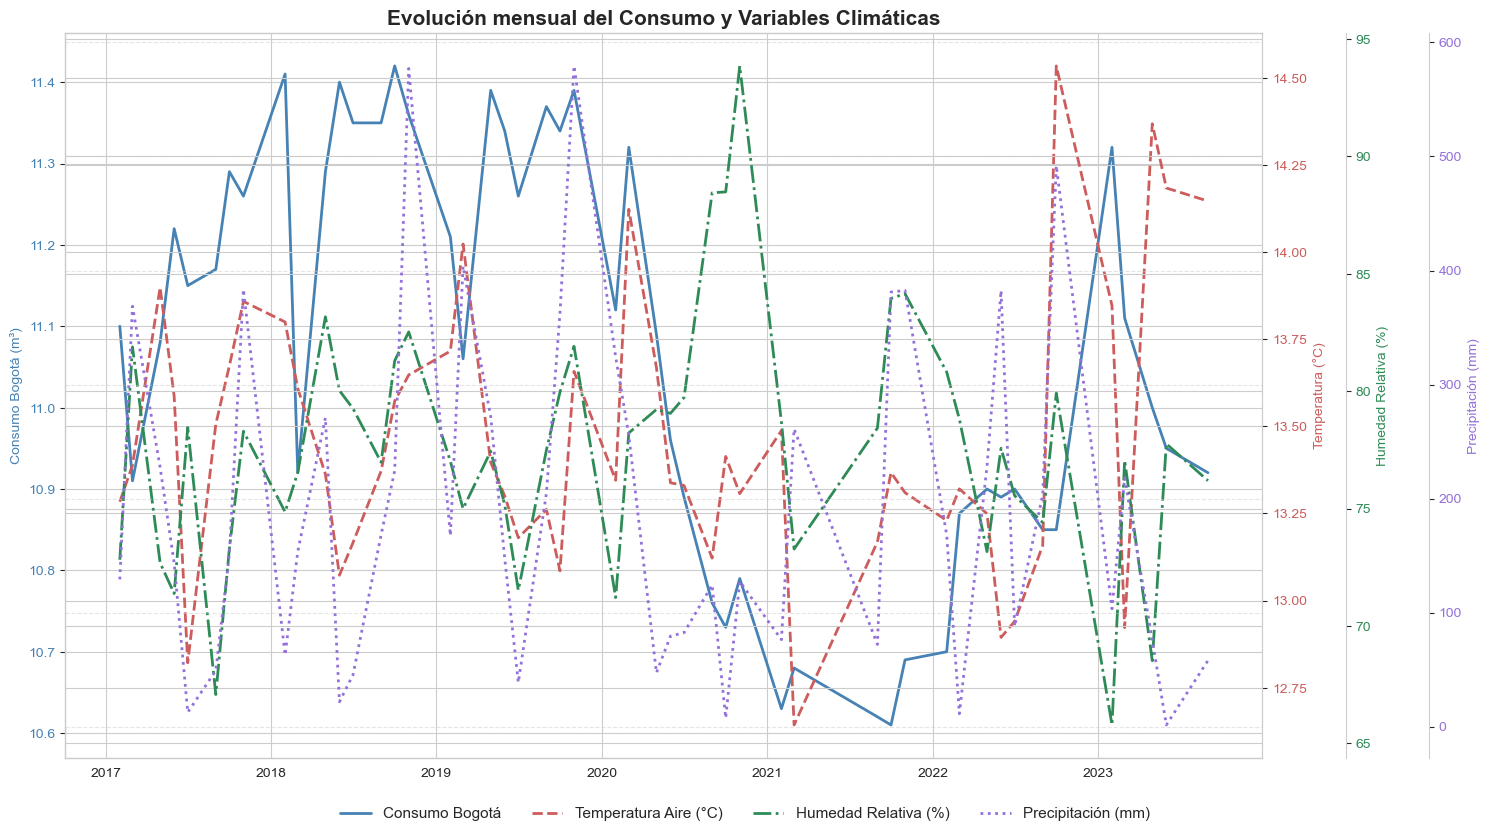

In [51]:

sns.set_style("whitegrid")
sns.set_palette("colorblind")
fig, ax1 = plt.subplots(figsize=(15, 8)) # Tamaño

# Eje 1: Consumo Bogotá
l1, = ax1.plot(df_final['Fecha'], df_final['Consumo_Bogota'], color='steelblue', label='Consumo Bogotá', linewidth=2)
ax1.set_ylabel('Consumo Bogotá (m³)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Eje 2: Temperatura
ax2 = ax1.twinx()
l2, = ax2.plot(df_final['Fecha'], df_final['Temp_aire_media'], color='indianred', linestyle='--', label='Temperatura Aire (°C)', linewidth=2)
ax2.set_ylabel('Temperatura (°C)', color='indianred')
ax2.tick_params(axis='y', labelcolor='indianred')

# Eje 3: Humedad
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
l3, = ax3.plot(df_final['Fecha'], df_final['Humedad_relativa_media'], color='seagreen', linestyle='-.', label='Humedad Relativa (%)', linewidth=2)
ax3.set_ylabel('Humedad Relativa (%)', color='seagreen')
ax3.tick_params(axis='y', labelcolor='seagreen')

# Eje 4: Precipitación
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
l4, = ax4.plot(df_final['Fecha'], df_final['Precipitacion_mm'], color='mediumpurple', linestyle=':', label='Precipitación (mm)', linewidth=2)
ax4.set_ylabel('Precipitación (mm)', color='mediumpurple')
ax4.tick_params(axis='y', labelcolor='mediumpurple')

plt.title('Evolución mensual del Consumo y Variables Climáticas', fontsize=15, weight='bold')
fig.legend(
    handles=[l1, l2, l3, l4],
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=4,
    fontsize=11,
    frameon=False
)
plt.grid(True, linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()

_________________________________

El gráfico de líneas con 4 ejes muestra estacionalidad clara en todas las variables, asi:


El consumo tiende a ser más bajo en algunos trimestres (probablemente por lluvias), y dentro de la epoca de pandemia se mostro un claro descenso entre 2020 a 2022, fenomeno que no se presneto tan marcado en la epoca de racionamiento 2024-2025, pero que sin embargo si se puede observar un ligero descenso desde finales de 2023 

La precipitación tiene picos notables que coinciden en ocasiones con cambios de consumo.

Las variables climáticas muestran oscilaciones regulares y suaves, lo que apoya su uso como predictores de comportamiento general, por posible estacionalidad.

___________________________________

<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); text-align: center;">
  <p style="font-size: 24px; font-weight: bold; margin-bottom: 20px;">2. Normalización, estandarización y división</p>
  <p style="font-size: 18px; margin: 0;">
   Acontinuación se realiza el procedimiento de normalización de datos, este proceso debe validarse en cuanto a resultados obtenidos despues del modelos, adicionalmente se dividen los datos en Train y Test, debido a que se cuenta con un dataset peqeuño se utiliza un división 70-30.
  </p>
</div>

___________________________________

In [31]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_final[features])

In [32]:
def create_sequences(data, n_steps=12):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i])
        y.append(data[i, 0])  # asumimos que la primera columna es la variable objetivo
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled)

In [33]:
split = int(len(X) * 0.70)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

_______________

<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); text-align: center;">
  <p style="font-size: 24px; font-weight: bold; margin-bottom: 20px;">3. Modelos LSTM</p>
  <p style="font-size: 18px; margin: 0;">
   Acontinuación se realiza el procedimiento para construir el modelo LSTM y realizar el pronostico
  </p>
</div>

_______________

In [58]:
# Modelo 1: LSTM Simple

model1 = Sequential()
model1.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train, y_train, epochs=100, verbose=0)


C:\Users\Sofia\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
# Modelo 2: LSTM + Dropout

model2 = Sequential()
model2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model2.add(Dropout(0.2))
model2.add(LSTM(50, activation='relu'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')
model2.fit(X_train, y_train, epochs=100, verbose=0)

In [66]:
# Modelo 3: LSTM con variables climáticas + eventos

model3 = Sequential()
model3.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')
model3.fit(X_train, y_train, epochs=100, verbose=0)

C:\Users\Sofia\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
#-----------------------------------------------------------------------------------------------------------------------------
# Esta función evalua evalua el desempeño de un modelo LSTM sobre datos de prueba, retornando las predicciones inversamente
# escaladas junto con métricas de error.
#
#    Parametros de entrada
#    * Modelos
#    * X_test :  Conjunto de entrada de prueba con forma (n_muestras, n_pasos, n_features).
#    * y_test : Etiquetas reales correspondientes a X_test, con forma (n_muestras,).
#
#    Devuelve:
#    * y_test_inv : Valores reales de consumo (desescalados).
#    * pred_inv :  Predicciones del modelo (desescaladas).
#    * rmse : Raíz del error cuadrático medio  entre real y predicho.
#-----------------------------------------------------------------------------------------------------------------------------
def evaluar_modelo(modelo, X_test, y_test, scaler):
    pred = modelo.predict(X_test)
    pred_inv = scaler.inverse_transform(np.concatenate([pred, X_test[:, -1, 1:]], axis=1))[:, 0]
    y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:]], axis=1))[:, 0]
    rmse = math.sqrt(mean_squared_error(y_test_inv, pred_inv))
    mae = mean_absolute_error(y_test_inv, pred_inv)
    return y_test_inv, pred_inv, rmse, mae

# Evaluar los tres modelos
real1, pred1, rmse1, mae1 = evaluar_modelo(model1, X_test, y_test, scaler)
real2, pred2, rmse2, mae2 = evaluar_modelo(model2, X_test, y_test, scaler)
real3, pred3, rmse3, mae3 = evaluar_modelo(model3, X_test, y_test, scaler)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


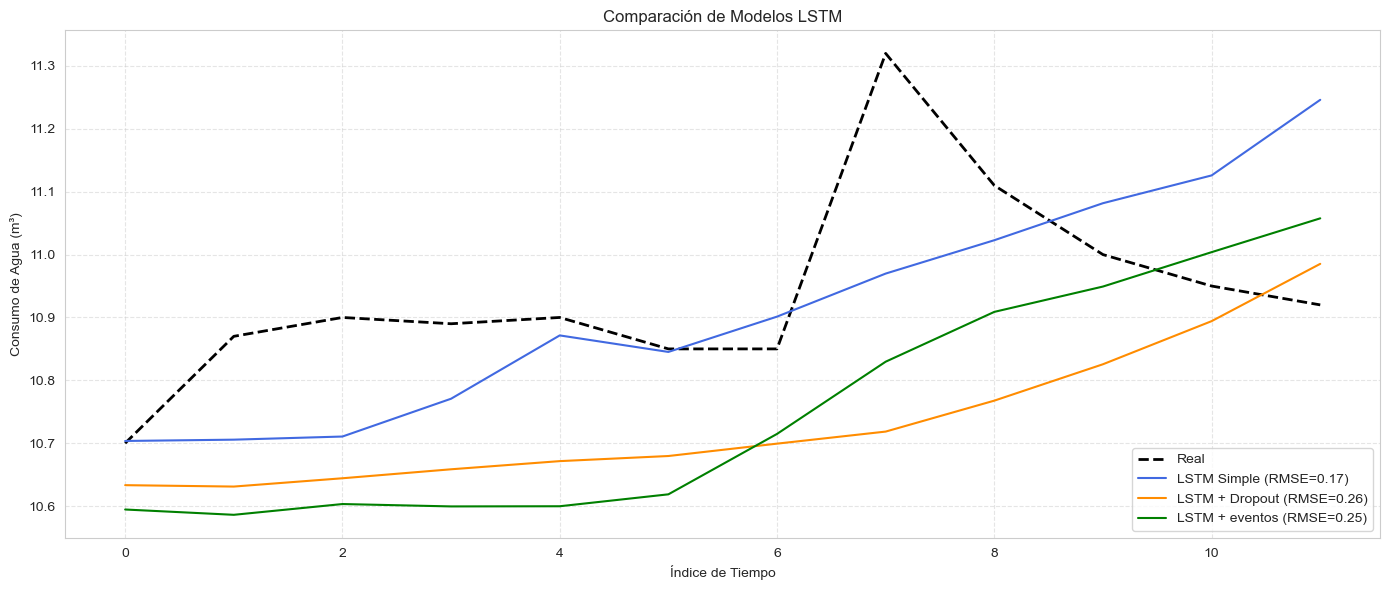

In [69]:
# comparativo
plt.figure(figsize=(14, 6))
plt.plot(real1, label=f'Real', color='black', linestyle='--', linewidth=2)
plt.plot(pred1, label=f'LSTM Simple (RMSE={rmse1:.2f})', color='royalblue')
plt.plot(pred2, label=f'LSTM + Dropout (RMSE={rmse2:.2f})', color='darkorange')
plt.plot(pred3, label=f'LSTM + eventos (RMSE={rmse3:.2f})', color='green')
plt.title('Comparación de Modelos LSTM')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Consumo de Agua (m³)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

___________________________________________________________________

In [34]:
#------------------------------------------------------------------------------------------------------------------
# A. Modelo Final seleccionado
#
#------------------------------------------------------------------------------------------------------------------

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=1)
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.1)



Epoch 1/100


C:\Users\Sofia\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6290
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.5730
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.5220
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4754
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.4328
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3937
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3579
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3251
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2948
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2669
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2412
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.2176
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1961
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1766
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1592
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0135
Epoch 84/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0131
Epoch 85/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0127
Epoch 86/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0121
Epoch 87/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0117
Epoch 88/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0113
Epoch 89/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0110
Epoch 90/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0106
Epoch 91/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0103
Epoch 92/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0101
Epoch 93/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0098
Epoch 94/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0096
Epoch 95/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0094
Epoch 96/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0093
Epoch 97/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0092
Epoch 98/100
1/1 ━━━━━━

Epoch 55/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0066 - val_loss: 0.0112
Epoch 56/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0066 - val_loss: 0.0114
Epoch 57/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0065 - val_loss: 0.0115
Epoch 58/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0065 - val_loss: 0.0115
Epoch 59/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0065 - val_loss: 0.0116
Epoch 60/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0064 - val_loss: 0.0118
Epoch 61/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0064 - val_loss: 0.0119
Epoch 62/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0064 - val_loss: 0.0120
Epoch 63/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0063 - val_loss: 0.0121
Epoch 64/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0063 - val_loss: 0.0123
Epoch 65/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0063 - val_loss: 0.0124
Epoch 66/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0062

In [35]:
#------------------------------------------------------------------------------------------------------------------
# B. Modelo
#
#------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

pred = model.predict(X_test)
pred_inv = scaler.inverse_transform(np.concatenate([pred, X_test[:, -1, 1:]], axis=1))[:, 0]
y_test_inv = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), X_test[:, -1, 1:]], axis=1))[:, 0]

rmse = math.sqrt(mean_squared_error(y_test_inv, pred_inv))
mae = mean_absolute_error(y_test_inv, pred_inv)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
RMSE: 0.15
MAE: 0.13


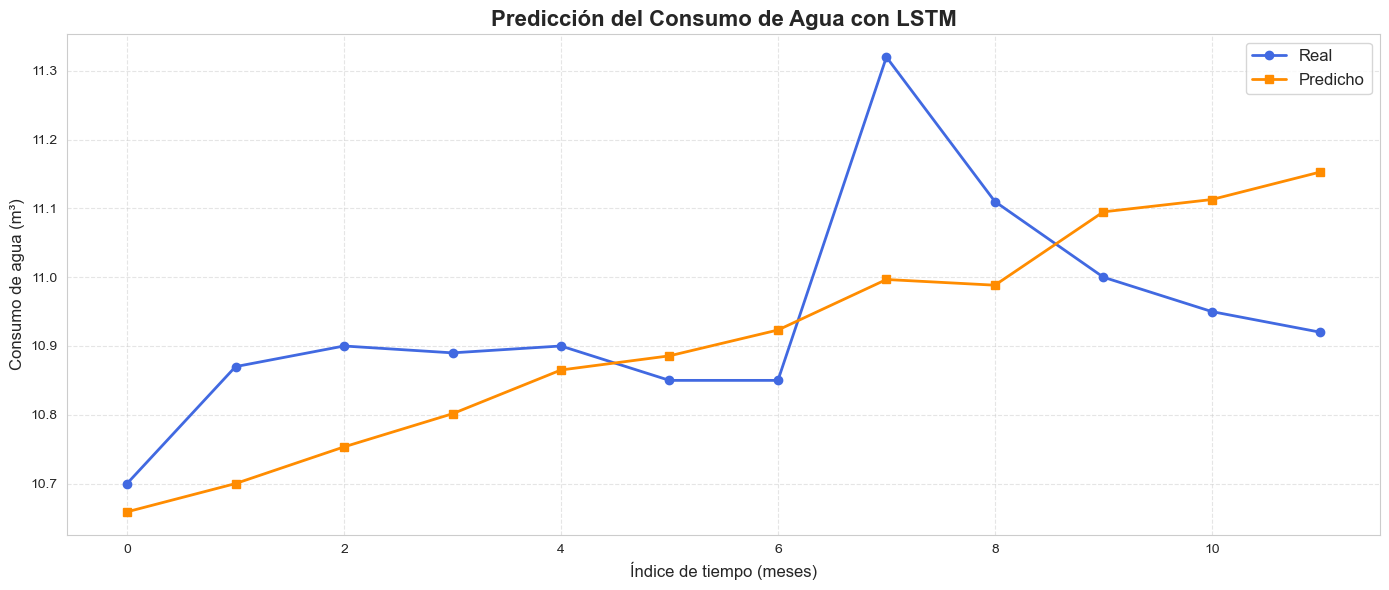

In [36]:
#------------------------------------------------------------------------------------------------------------------
# C. Gráfica
#
#------------------------------------------------------------------------------------------------------------------
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Real', color='royalblue', linewidth=2, marker='o')
plt.plot(pred_inv, label='Predicho', color='darkorange', linewidth=2, marker='s')
plt.title('Predicción del Consumo de Agua con LSTM', fontsize=16, fontweight='bold')
plt.xlabel('Índice de tiempo (meses)', fontsize=12)
plt.ylabel('Consumo de agua (m³)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [53]:
#------------------------------------------------------------------------------------------------------------------
# D. Prónostico de 6 meses en adelante
#
#------------------------------------------------------------------------------------------------------------------
X_last = data_scaled[-12:].copy()  
forecast = []

# Pronosticar 6 meses hacia adelante
for _ in range(6):
    x_input = X_last.reshape((1, 12, X_last.shape[1]))
    y_pred = model.predict(x_input)
    
    # Crear nueva entrada combinando la predicción con las últimas variables auxiliares
    last_aux = X_last[-1, 1:]  # temperatura y humedad de último mes conocido
    new_step = np.concatenate([y_pred.flatten(), last_aux])  # forma: (3,)
    
    # Agregar predicción a resultados
    forecast.append(new_step[0])
    
    # Actualizar X_last (deslizar ventana)
    X_last = np.vstack((X_last[1:], new_step))

# Desescalar resultados
forecast_array = np.array(forecast).reshape(-1, 1)
aux_repeat = np.tile(X_last[-1, 1:], (6, 1))
forecast_scaled = np.concatenate([forecast_array, aux_repeat], axis=1)
forecast_real = scaler.inverse_transform(forecast_scaled)[:, 0]

# Generar fechas futuras
last_date = df_final['Fecha'].max()
future_dates = pd.date_range(last_date + pd.DateOffset(months=1), periods=6, freq='MS')

# Resultados
forecast_df = pd.DataFrame({'Fecha': future_dates, 'Consumo_Pronosticado': forecast_real})
print(forecast_df)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
       Fecha  Consumo_Pronosticado
0 2023-10-01             11.146977
1 2023-11-01             11.166513
2 2023-12-01             11.185984
3 2024-01-01             11.202280
4 2024-02-01             11.221779
5 2024-03-01             11.240572


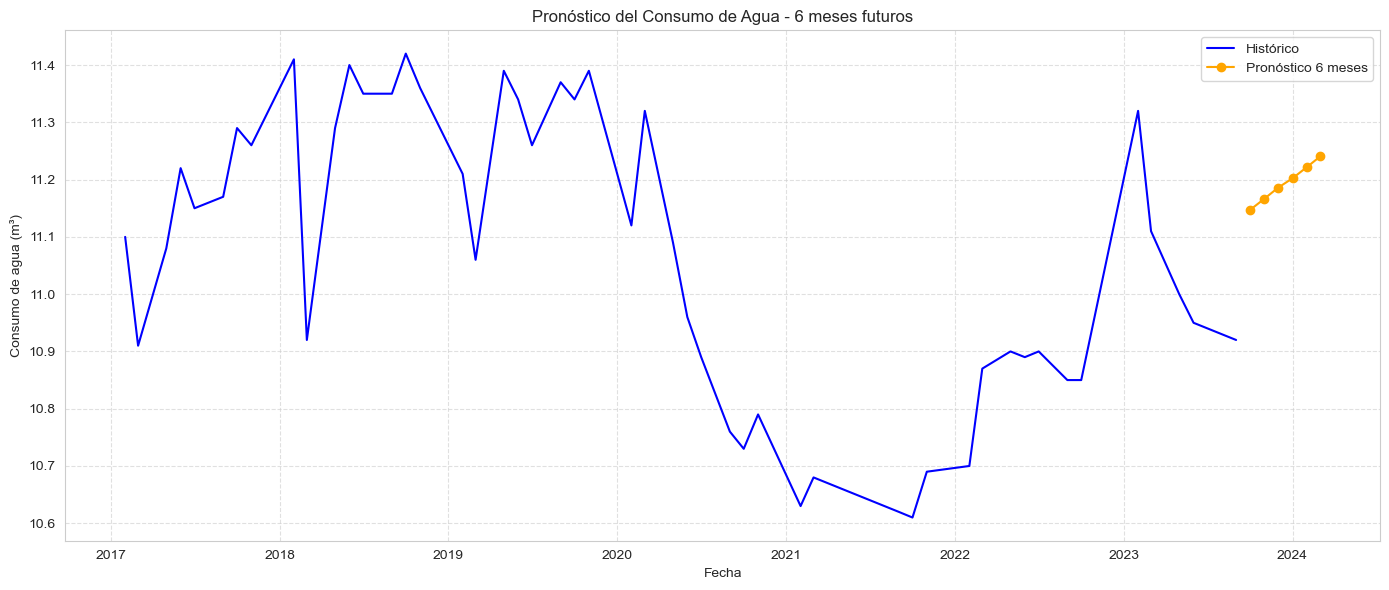

In [54]:
# Graficar pronóstico junto a los datos reales
plt.figure(figsize=(14,6))
plt.plot(df_final['Fecha'], df_final['Consumo_Bogota'], label='Histórico', color='blue')
plt.plot(forecast_df['Fecha'], forecast_df['Consumo_Pronosticado'], label='Pronóstico 6 meses', color='orange', marker='o')
plt.title('Pronóstico del Consumo de Agua - 6 meses futuros')
plt.xlabel('Fecha')
plt.ylabel('Consumo de agua (m³)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

___________________

In [82]:
# Guardar modelo
model.save('model/modelo_lstm.h5')

# Guardar scaler
import joblib
joblib.dump(scaler, 'model/scaler.pkl')
joblib.dump(scaler, './model/scaler.gz')

# Exportar df_final como CSV
df_final.to_csv('data/datos_modelo_lstm.csv', index=False, encoding='utf-8')